In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Transaction_ID,Product_Category,Price,Quantity,Customer_rating,Discount_Code,Total_Sale_Amount,Weighted_Rating,Price_Tier
0,101,Electronics,150.99,1.0,4.50,YES,150.99,4.50,High_Price
1,102,Books,25.00,2.0,3.00,NO,50.00,6.00,Mid_Price
2,103,Groceries,5.50,5.0,5.00,NO,27.50,25.00,Low_Price
3,104,Books,40.00,1.0,4.25,YES,40.00,4.25,Mid_Price
4,105,Electronics,180.50,1.0,4.00,NO,180.50,4.00,High_Price


In [3]:
correlation=df['Price'].corr(df['Quantity'])
print(f'The correlation is: {correlation}')

The correlation is: -0.6465109927953719


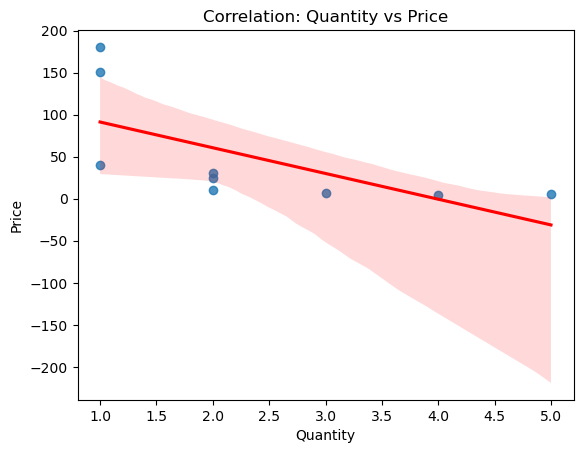

In [4]:
sns.regplot(df, x='Quantity', y='Price', line_kws={'color':'red'})
plt.title('Correlation: Quantity vs Price')
plt.show()

In [5]:
correlation=df['Price'].corr(df['Customer_rating'])
print(f'The correlation is: {correlation}')

The correlation is: -0.014864541086836007


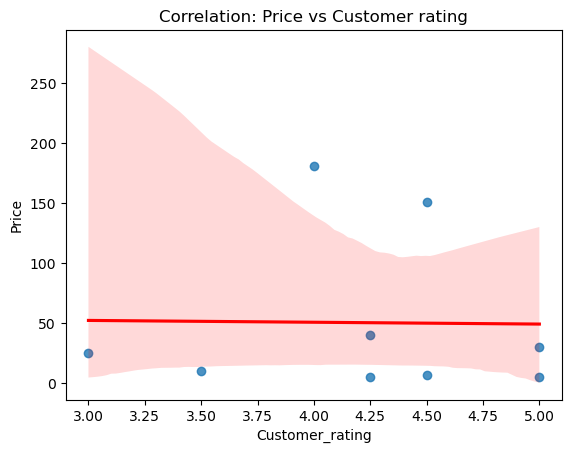

In [6]:
sns.regplot(df, x='Customer_rating', y='Price', line_kws={'color':'red'})
plt.title('Correlation: Price vs Customer rating')
plt.show()

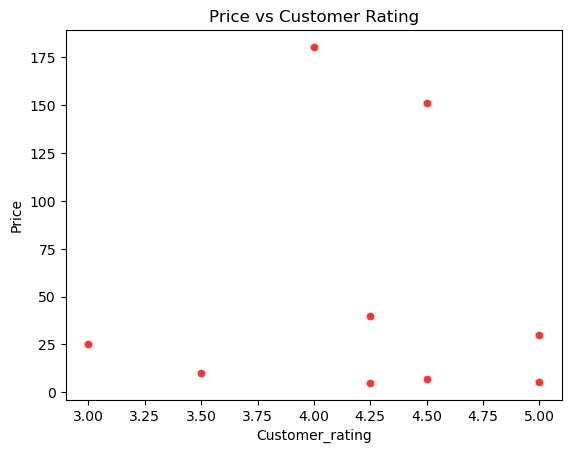

In [7]:
sns.scatterplot(df, x='Customer_rating', y='Price', alpha=0.8, color='red')
plt.title('Price vs Customer Rating')
plt.show()

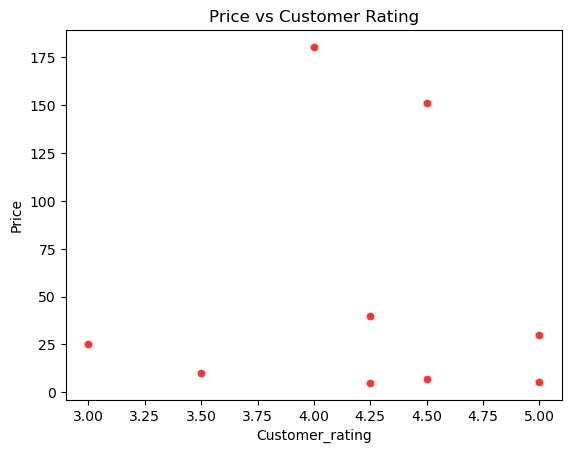

In [8]:
sns.scatterplot(df, x='Customer_rating', y='Price', alpha=0.8, color='red')
plt.title('Price vs Customer Rating')
plt.show()

In [10]:
data=pd.read_csv('data_science_student_marks.csv')
data.head()

,student_id,location,age,sql_marks,excel_marks,python_marks,power_bi_marks,english_marks
0,4,Sydney,24,95,99,87,82,75
1,5,Tokyo,24,99,95,89,86,82
2,6,Berlin,22,72,70,99,79,77
3,7,London,23,97,90,74,72,85
4,8,Tokyo,22,91,71,79,80,75


In [17]:
def distplots(col):
    sns.distplot(data[col])
    plt.show()

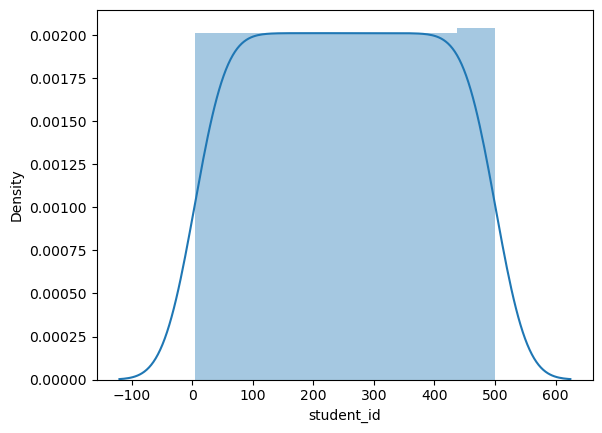

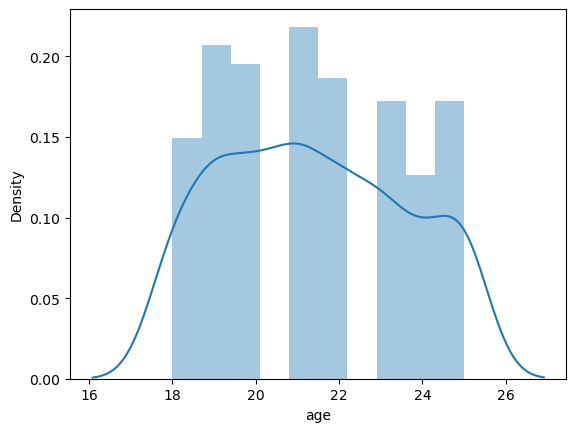

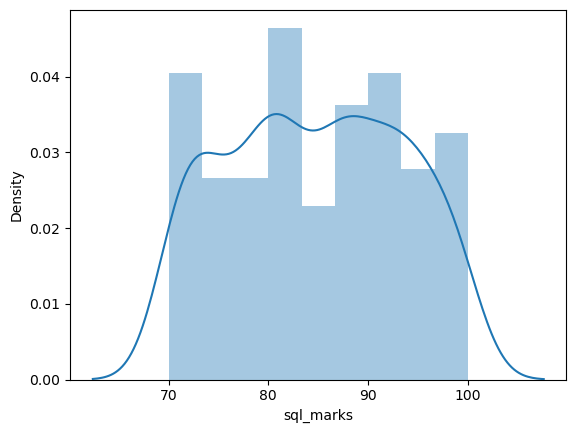

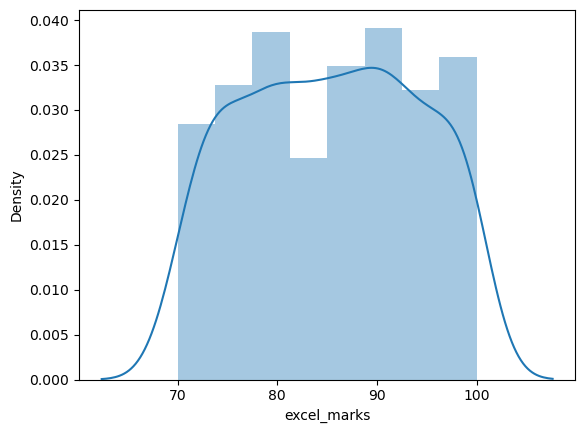

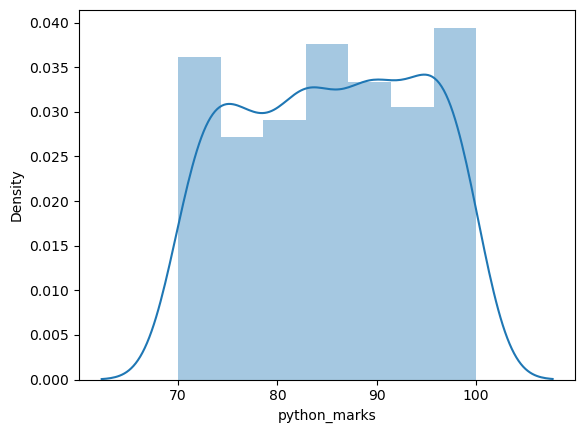

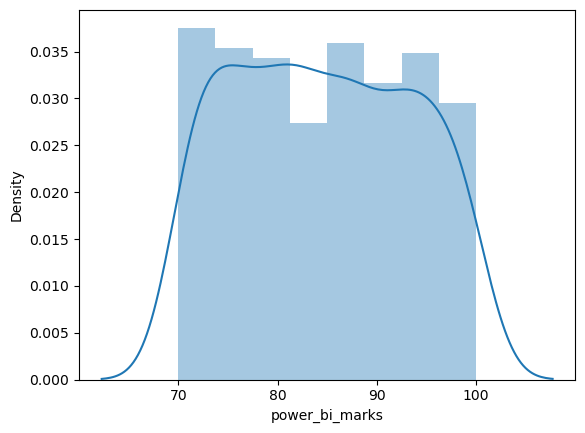

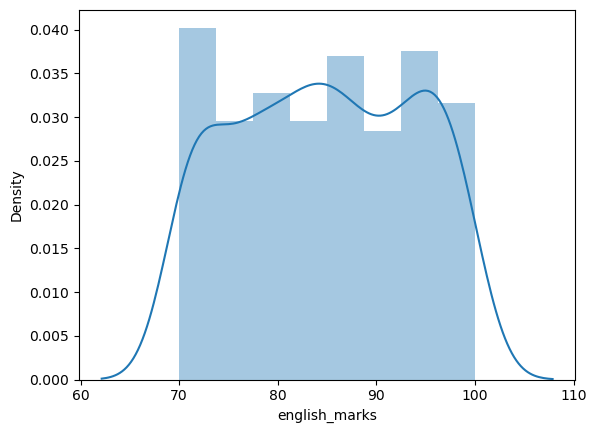

In [18]:
for i in list(data.select_dtypes(exclude=['object']).columns):
    distplots(i)

In [19]:
data['location'].value_counts()

location
Tokyo          60
Los Angeles    60
Melbourne      58
New York       57
Toronto        56
Paris          55
Sydney         53
Berlin         52
London         46
Name: count, dtype: int64

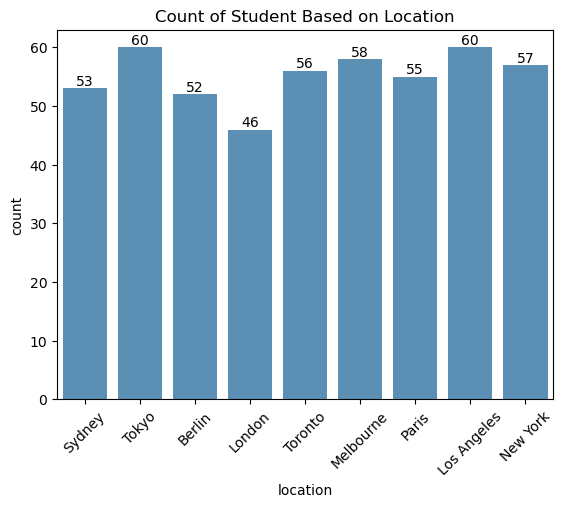

In [ ]:
#Number of students based on their location
ax=.sns.countplot(data, x='location', alpha=0.8)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Count of Student Based on Location')
plt.xticks(rotation=45)
plt.show()

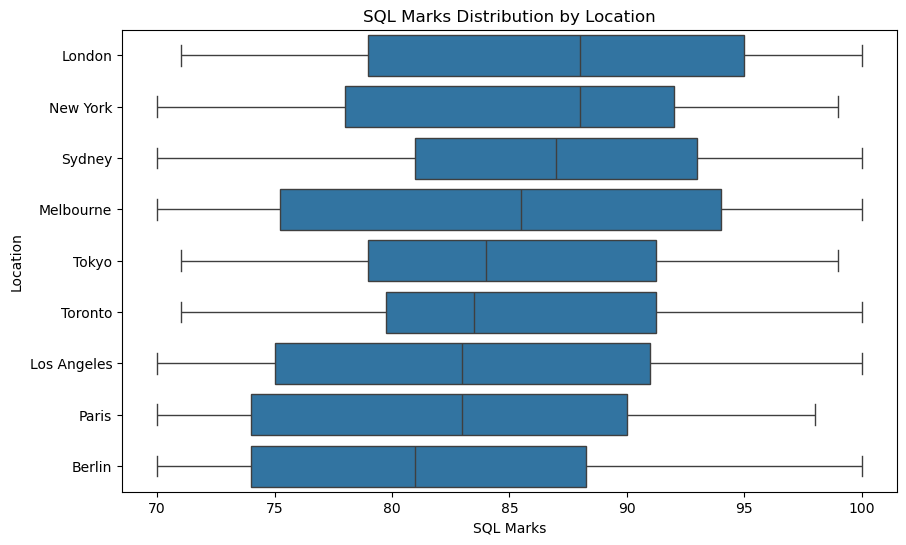

In [24]:
plt.figure(figsize=(10, 6))
# Sort the locations by median sql_marks for better visualization
order = data.groupby('location')['sql_marks'].median().sort_values(ascending=False).index
sns.boxplot(data, x='sql_marks', y='location', order=order)
plt.title('SQL Marks Distribution by Location')
plt.xlabel('SQL Marks')
plt.ylabel('Location')
plt.show()

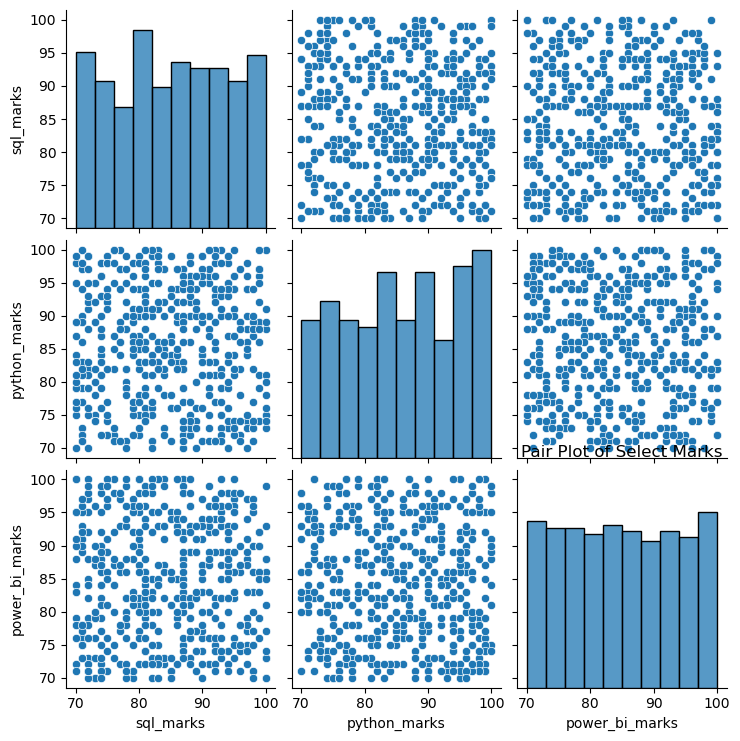

In [ ]:
# Multivariate Plot: Pair Plot (subset of marks)
marks_cols = ['sql_marks', 'python_marks', 'power_bi_marks']
sns.pairplot(data[marks_cols])
plt.title('Pair Plot of Select Marks', y=1.02)
plt.show()

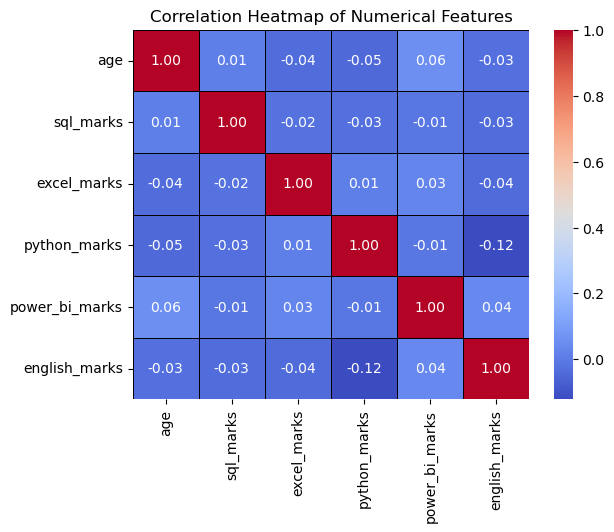

In [ ]:
#Correlation Plot: Heatmap
#Select numerical columns for correlation
numeric_cols = ['age', 'sql_marks', 'excel_marks', 'python_marks', 'power_bi_marks', 'english_marks']
correlation_matrix = data[numeric_cols].corr()

sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=.5, 
    linecolor='black'
)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()